In [2]:
!pip install kagglehub # Install the package using pip

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:10<00:00, 114MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [4]:
import pandas as pd
import numpy as np

In [5]:
# List all datasets under the Kaggle dataset
!kaggle datasets list -s "dogs vs cats"

# Download the specific dataset
!kaggle datasets download -d salader/dogs-vs-cats

# Unzip the downloaded dataset
!unzip dogs-vs-cats.zip -d ./dogs-vs-cats/


Streaming output truncated to the last 5000 lines.
  inflating: ./dogs-vs-cats/train/dogs/dog.4419.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.442.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4420.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4421.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4422.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4424.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4425.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4426.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4427.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4431.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4433.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4436.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4438.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4439.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.444.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4440.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4441.jpg  
  inflating: ./dogs-vs-cats/train

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
train_dir = '/content/dogs-vs-cats/train'
validation_dir = '/content/dogs-vs-cats/test'

# Generating training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',  # Automatically infer labels from folder names
    label_mode='int',  # Labels as integers
    batch_size=32,  # Batch size for training
    image_size=(256, 256),  # Resize images to this size
    shuffle=True,  # Shuffle the dataset
    seed=123  # Ensures reproducibility
)

# Generating validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize

def preprocess_image(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(preprocess_image)
validation_ds = validation_ds.map(preprocess_image)

In [18]:
# Create CNN model

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 81ms/step - accuracy: 0.5546 - loss: 2.7899 - val_accuracy: 0.6414 - val_loss: 0.6315
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6493 - loss: 0.6423 - val_accuracy: 0.6626 - val_loss: 0.6449
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 81ms/step - accuracy: 0.7132 - loss: 0.5557 - val_accuracy: 0.7682 - val_loss: 0.4827
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7702 - loss: 0.4748 - val_accuracy: 0.7782 - val_loss: 0.4686
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7965 - loss: 0.4307 - val_accuracy: 0.7356 - val_loss: 0.6152
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8201 - loss: 0.3841 - val_accuracy: 0.7788 - val_loss: 0.4645
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.8506 - loss: 0.3310 - val_accuracy: 0.7932 - val_loss: 0.4386
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8763 - loss: 0.2667 - 

In [22]:
import matplotlib.pyplot as plt

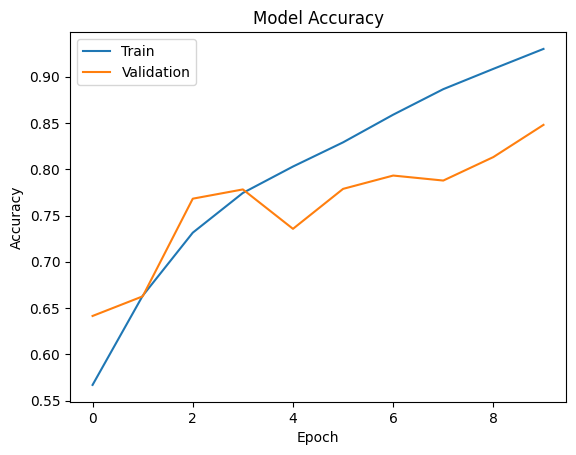

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

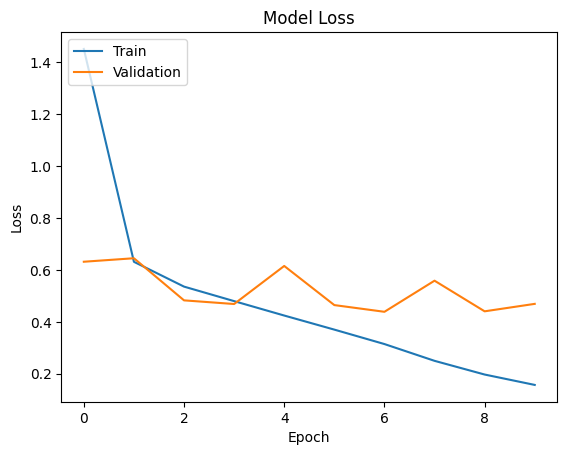

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [16]:
# ways to reduce overfitting

# Add more.data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [26]:
!pip install opencv-python

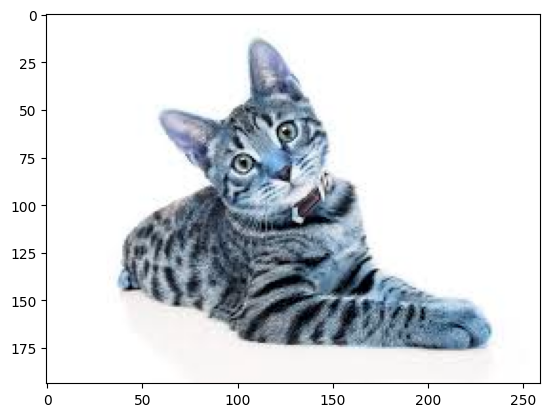

In [28]:
import cv2

test_img = cv2.imread('/content/cat.jpeg')
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [29]:
test_img.shape

(194, 259, 3)

In [40]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert to RGB

In [42]:
# Resize the image to 256x256
test_img_resized = cv2.resize(test_img, (256, 256))

# Reshape the resized image
test_input = test_img_resized.reshape((1, 256, 256, 3))

In [43]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)

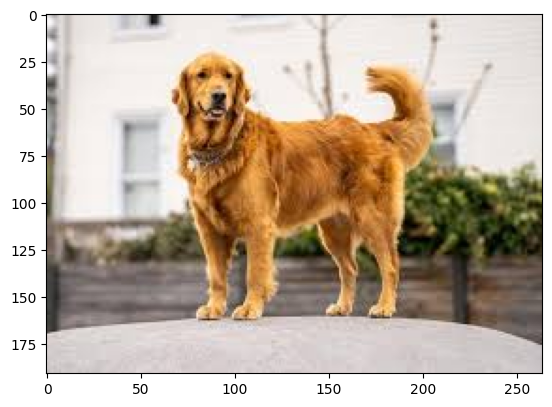

In [44]:
import cv2

test_img2 = cv2.imread('/content/dog.jpeg')
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [45]:
test_img2.shape

(191, 264, 3)

In [46]:
test_img2 = cv2.resize(test_img, (256, 256))

In [47]:
test_input2 = cv2.resize(test_img, (256, 256)).reshape((1, 256, 256, 3))